In [233]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
from sklearn.metrics import classification_report, confusion_matrix

In [201]:
def activation(Z, K):
    return (K[0] + K[1]*Z)


def forward_propagation(X, params):
    W1 = params["W1"]
    B1 = params["B1"]
    W2 = params["W2"]
    B2 = params["B2"]
    K = params["K"]
    
    cache = {}
    
#     print ("W1 shape: ", W1.shape)
#     print ("B1 shape: ", B1.shape)
    
    Z1 = np.dot(W1, X) + B1
#     print ("Z1 shape: ", Z1.shape)
    
    A1 = activation(Z1, K)
#     print ("A1 shape: ", A1.shape)
    
    cache["Z1"] = Z1
    cache["A1"] = A1

#     print ("W2 shape: ", W2.shape)
#     print ("B2 shape: ", B2.shape)
    
    Z2 = np.dot(W2, A1) + B2
#     print ("Z2 shape: ", Z2.shape)
    
    A2 = softmax(Z2, axis=0)
#     print ("A2 shape: ", A2.shape)
    
    cache["Z2"] = Z2
    cache["A2"] = A2

    return cache, A2


def initialize_network(hidden_units_list):
    params = {}
    for i in range(len(hidden_units_list)-1):
        params["W"+str(i+1)] = np.random.randn(hidden_units_list[i+1], hidden_units_list[i])
        params["B"+str(i+1)] = np.random.randn(hidden_units_list[i+1], 1)

    params["K"] = np.random.rand(2)
    return params


def loss(Y_hat, Y):
    N = Y.shape[1]
    ce = -np.sum(np.multiply(Y, np.log(Y_hat))) / N
    return ce


def back_propagation(cache, params, X, Y, Y_hat):
    A1 = cache["A1"]
    Z1 = cache["Z1"]
    W2 = params["W2"]
    B2 = params["B2"]
    B1 = params["B1"]
    K = params["K"]
    m = X.shape[1]
    
    dZ2 = Y_hat - Y
#     print  ("dZ2.shape: ", dZ2.shape)
    
    dW2 = np.dot(dZ2, (1/m)*A1.transpose())
#     print ("dW2 shape: ", dW2.shape)
    
    dB2 = np.mean(dZ2, axis = 1)
    dB2 = dB2.reshape(B2.shape)
#     print ("dB2 shape: ", dB2.shape)
    
    dA1 = np.dot(W2.transpose(), dZ2)
    print ("dA1 shape: ", dA1.shape)
    
    dZ1 = K[1]*dA1
    dW1 = np.dot(dZ1, (1/m)*X.transpose())
#     print ("dW1 shape: ", dW1.shape)
    
    dB1 = np.mean(dZ1, axis = 1)
    dB1 = dB1.reshape(B1.shape)
#     print ("dB1 shape: ", dB1.shape)
    
    dK = [np.mean(dA1)]
    dK.append(np.mean(np.multiply(dA1, Z1)))
    dK = np.array(dK)
    
    gradients = {}
    gradients["dW1"] = dW1
    gradients["dB1"] = dB1
    gradients["dW2"] = dW2
    gradients["dB2"] = dB2
    gradients["dK"] = dK
    
    return gradients



def test(X_test, Y_test, params):
    cache, A2 = forward_propagation(X_test, params)
    
    y_pred = np.argmax(A2, axis=0)
    y_pred = y_pred.tolist()
#     print ("PRED: ", y_pred)
    
    y_test = np.argmax(Y_test, axis=0)
    y_test = y_test.tolist()
    
#     print (confusion_matrix(y_pred, y_test))
    print (classification_report(y_pred, y_test))    


    
def update_params(alpha, gradients, params):
    W1 = params["W1"]
    W2 = params["W2"]
    B1 = params["B1"]
    B2 = params["B2"]
    K = params["K"]
    
    dW1 = gradients["dW1"]
    dW2 = gradients["dW2"]
    dB1 = gradients["dB1"]
    dB2 = gradients["dB2"]
    dK = gradients["dK"]
    
    params["W1"] = W1-(alpha*(dW1))
    params["W2"] = W2-(alpha*(dW2))
    
    params["B1"] = B1-(alpha*(dB1))
    params["B2"] = B2-(alpha*(dB2))
    
    params["K"] = K-(alpha*(dK))
    return params
    

def train(X, Y, params, alpha, epoch):
    params_info = {
        "initial_settings": params
    }
    losses = []
    for j in range(epoch):
        cache, Y_hat = forward_propagation(X, params)
        gradients = back_propagation(cache, params, X, Y, Y_hat)
        params = update_params(alpha, gradients, params)
    
        s = loss(Y_hat, Y)
        print ("EPOCH: ", j+1, "  LOSS: ", s)
        params_info[j+1] = params
        losses.append(s)
        print ("\n\n\n------------------------------------------------------------------------\n\n\n")
        
    return losses, params, params_info

In [234]:
"""
Since we are supposed to make only 3-layered NN (1 input layer, 1 hidden layer and 1 output layer). Thus
the list hidden_units_layer tells the number of neurons in each layer. The number of neurons in the hidden 
layer is a haperparameter , thus can be changed and experimented on. Number of Input newrons and output layer 
neurons remains fixed.
"""

hidden_units_layer = [4,3,2]
# print ("X_train shape: ", X_train.shape)
# print ("Y_train shape: ", Y_train.shape)
params = initialize_network(hidden_units_layer)
alpha = 0.01  # hyperparameter, can be changed and experimented on
epoch= 1000   # hyperparameter, can be changed and experimented on
losses, params, params_info = train(X_train, Y_train, params, alpha, epoch)

W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 0.5270742  -0.04192049  2.56849213 ...  0.30014417  0.69414077
   0.55326158]
 [ 2.3605572   1.77889158 -0.05027735 ...  1.66674675  1.36251802
   1.55407859]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  1   LOSS:  1.3025198313861936



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 1.1735202   0.20931315  2.63733724 ...  0.6696408   0.87149842
   0.86900311]
 [ 2.08618671  1.67005767 -0.07138247 ...  1.53017759  1.23991838
   1.41984004]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3

EPOCH:  57   LOSS:  0.3145720336885449



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 5.39877931  2.1864719   3.48544155 ...  3.3206392   2.20645932
   3.16563262]
 [ 0.59973423  1.05268365 -0.15855512 ...  0.78497194  0.55669367
   0.68397943]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  58   LOSS:  0.31326971141565374



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 5.412685    2.19914014  3.49564677 ...  3.3340588   2.21372265
   3.17755521]
 [ 0.59728273  1.05073647 -0.15813141 ...  0.78322083  0.55543515
   0.682401

dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  113   LOSS:  0.25252210723817087



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 5.92513985  2.77409496  3.98739523 ...  3.8991574   2.54489227
   3.68985747]
 [ 0.5515377   0.99522268 -0.13380261 ...  0.73879496  0.53735984
   0.64693931]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  114   LOSS:  0.2515484898904831



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 5.93215953  2.78333574  3.99530519 ...  3.90762564  2.55043208
   3.69774015]
 [ 0.55143787  

Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 6.27012014  3.25877543  4.37584699 ...  4.32019986  2.85319346
   4.09197232]
 [ 0.55153784  0.97737666 -0.12225433 ...  0.72522187  0.5523488
   0.64170484]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  169   LOSS:  0.20279108393411216



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 6.27584453  3.26727588  4.38204127 ...  4.32717514  2.85894367
   4.09882495]
 [ 0.55153471  0.97712513 -0.12220022 ...  0.72499211  0.55266403
   0.64162321]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  170   LOSS:  0.201985

dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  226   LOSS:  0.161423912443185



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 6.58105909  3.73877704  4.68401608 ...  4.69331904  3.19641893
   4.46849339]
 [ 0.54536319  0.96098101 -0.12728571 ...  0.70838455  0.56759268
   0.63311912]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  227   LOSS:  0.1607809868491355



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 6.58607659  3.74681556  4.6884302  

Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 6.86246987  4.20398676  4.89962361 ...  5.01711469  3.56417581
   4.8142267 ]
 [ 0.52341473  0.93526642 -0.14545995 ...  0.68128029  0.5717083
   0.61331987]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  287   LOSS:  0.12735694318685062



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 6.86681893  4.21141627  4.90243804 ...  5.02200075  3.57033192
   4.81960714]
 [ 0.52291728  0.93474878 -0.14583237 ...  0.68074851  0.57165666
   0.61289529]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  288   LOSS:  0.126882

dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  338   LOSS:  0.10630133166187176



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.07384467  4.5745727   5.01921615 ...  5.25046234  3.88259527
   5.07783435]
 [ 0.49270793  0.90490018 -0.16637275 ...  0.65090959  0.56395489
   0.58779995]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  339   LOSS:  0.10594775455852622



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.07762151  4.58137871  5.02105492 ...  5.2545568   3.88866422
   5.08259203]
 [ 0.49203055 

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.27374242  4.94362601  5.10541895 ...  5.46373038  4.22333816
   5.33253479]
 [ 0.45006711  0.86517402 -0.19072185 ...  0.613097    0.54492527
   0.55357911]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  396   LOSS:  0.08893272067255995



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.27699763  4.94977087  5.10667393 ...  5.46714645  4.22920945
   5.33673132]
 [ 0.44925596  0.86443259 -0.1911483  ...  0.6124067   0.54450804
   0.55293631]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  397   LOSS:  0.08868333134026844



--------------------------------------------------------------

dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  451   LOSS:  0.07720227220045649



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.44615301  5.27225149  5.16937217 ...  5.64219387  4.54560324
   5.55626682]
 [ 0.40216649  0.82200212 -0.21424846 ...  0.57358558  0.51794772
   0.51598746]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  452   LOSS:  0.07702213404732687



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.4490832   5.27785491  5.17045234 ...  5.64518339  4.

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.60575384  5.57408492  5.23120571 ...  5.80291022  4.85373142
   5.76313498]
 [ 0.35041898  0.7764958  -0.23696704 ...  0.53300394  0.48503821
   0.47603617]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  508   LOSS:  0.06839878307039893



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.60855005  5.57927403  5.23236676 ...  5.80568798  4.85910079
   5.76672625]
 [ 0.34946837  0.77566943 -0.23736641 ...  0.53227359  0.48440831
   0.47530748]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  509   LOSS:  0.06826768856697439



--------------------------------------------------------------

dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  564   LOSS:  0.0620153351803487



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.7648558   5.86066285  5.30309763 ...  5.95900976  5.1522842
   5.96422993]
 [ 0.29506672  0.72890607 -0.25950334 ...  0.4911666   0.44730564
   0.43387052]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  565   LOSS:  0.06191697623597534



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.76766112  5.86553913  5.30447695 ...  5.96172836  5.15738595
   5.9677075

A2 shape:  (2, 1200)
z2:  [[ 7.92123503  6.12240482  5.38575914 ...  6.10901175  5.42601081
   6.15404121]
 [ 0.23986004  0.68242757 -0.28104399 ...  0.45050858  0.4081986
   0.39227279]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  620   LOSS:  0.05716671004296927



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 7.92412542  6.12705157  5.38739196 ...  6.11175718  5.43085956
   6.15747175]
 [ 0.23884367  0.68158027 -0.28143564 ...  0.4497675   0.40746971
   0.39151055]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  621   LOSS:  0.05709094857354786



------------------------------------------------------------------------



W1 shape

dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  675   LOSS:  0.05344650654902317



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.08612634  6.37727496  5.4841222  ...  6.26434479  5.69070361
   6.34549378]
 [ 0.18242538  0.63497005 -0.30304386 ...  0.40894424  0.36668931
   0.34936707]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  676   LOSS:  0.05338640026723295



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.08912762  6.38173309  5.486001

dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  733   LOSS:  0.05031658068722471



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.26330563  6.63097183  5.59948802 ...  6.42890022  5.95075677
   6.54268199]
 [ 0.12217741  0.58599065 -0.32604982 ...  0.36584292  0.32271676
   0.30465522]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  734   LOSS:  0.05026831367753919



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.2664123   6.63526251  5.60158183 ...  6.43176832  5.95512055
   6.54607182]
 [ 0.12113482 

dB1 shape:  (3, 1)
EPOCH:  788   LOSS:  0.04789511644640347



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.4363387   6.86303691  5.7190445  ...  6.58792207  6.18504331
   6.72848251]
 [ 0.06477207  0.5399164  -0.34810168 ...  0.32504744  0.28065459
   0.26224312]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  789   LOSS:  0.04785508354262293



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.43952102  6.86718432  5.72129309 ...  6.59083429  6.18919812
   6.73184698]
 [ 0.06372824  0.53908299 -0.34850457 ...  0.32430716  

W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.62249264e+00  7.09954251e+00  5.85294093e+00 ...  6.75766252e+00
   6.42018126e+00  6.92259780e+00]
 [ 4.34202566e-03  4.91875183e-01 -3.71561977e-01 ...  2.82239207e-01
   2.36332775e-01  2.17715637e-01]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  847   LOSS:  0.04573458756463497



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.62572536e+00  7.10354963e+00  5.85530350e+00 ...  6.76060026e+00
   6.42413431e+00  6.92592439e+00]
 [ 3.30308387e-03  4.91052477e-01 -3.71967875e-01 ...  2.81503774e-01
   2.35570795e-01  2.16950755e-01]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  

dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  902   LOSS:  0.044030253558043665



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.80425695  7.32040904  5.98730958 ...  6.92240493  6.63659313
   7.10764708]
 [-0.05359917  0.44612045 -0.39433934 ...  0.24122579  0.19384888
   0.17507442]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  903   LOSS:  0.04400157893115233



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.80751233  7.324289    5.98974

A2 shape:  (2, 1200)
z2:  [[ 8.99321043  7.54187464  6.12954672 ...  7.09287093  6.85072151
   7.29631995]
 [-0.11295196  0.39944693 -0.41797488 ...  0.19917208  0.15036186
   0.13139622]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  961   LOSS:  0.04245859225838387



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ 8.99646748  7.54563056  6.13201558 ...  7.09580335  6.85432951
   7.29954383]
 [-0.11396831  0.39864883 -0.4183823  ...  0.19845125  0.14961749
   0.13064803]]
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  962   LOSS:  0.04243389717934647



------------------------------------------------------------------------



W1 shap

In [228]:
test(X_test, Y_test, params)

W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 172)
A1 shape:  (3, 172)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 172)
A2 shape:  (2, 172)
z2:  [[  0.19728261  -1.78741868  -6.04001335   0.92603652   2.61085435
   -5.85538109  -0.75403188  -1.58489089  -3.4068332   -6.53529513
   -3.46663924   4.66415797  -5.77744703   1.59187789  -4.34183648
   -1.31180404  -4.0224965    4.28272892   1.69011271  -4.20656451
    2.21341186   4.20281506  -2.18345717  -6.12551082  -2.85952694
   -4.85613789  -4.69305663   3.57132391  -3.38481717   2.1055356
   -0.81408615  -6.76803433  -3.32443322   0.79240013  -3.41629527
    4.68006319   2.49862064  -6.13078485  -1.27407917  -5.61144027
   -7.39778199   3.74627109   4.06874399  -2.79163023   3.6108042
    4.35792019   0.24883814  -5.3330322   -0.75403805   2.04480983
    0.24633357   0.8370048    4.17018186   4.42024758  -0.93374514
   -4.64215335  10.32773042  -6.49376433   6.07518091  -1.95800295
    5.23581304  -3.78693379  -7.25132153 

In [229]:
test(X_train, Y_train, params)

W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
z2:  [[ -7.3449176   -3.24212694  -3.59523108 ...  -6.07436189   0.74794768
   -4.18529911]
 [-14.98236302  -7.56938044  -6.28543706 ... -11.32044811  -2.13554514
   -8.87106739]]
PRED:  [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,

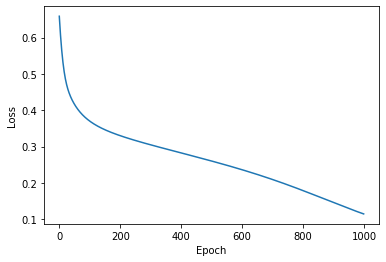

In [230]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [231]:
import pickle
with open ("/home/precily/Pictures/params_info.pkl", "wb") as file:
    pickle.dump(params_info, file)

In [232]:
len(params_info)

1001

In [235]:
 # ---------------------- END ------------------------------------

# Data Making

In [173]:
data = pd.read_csv("/home/precily/Desktop/bank note/BankNote_Authentication-1.csv")
# data

# data = data.drop
data = data.sample(frac=1)
train = data[:1200]
test = data[1200:]
train

,variance,skewness,curtosis,entropy,class
160,5.04520,3.89640,-1.4304,0.86291,0
517,1.76200,4.36820,2.1384,0.75429,0
425,1.74200,-4.80900,8.2142,-2.06590,0
815,-3.11280,-6.84100,10.7402,-1.01720,1
1317,-1.26670,2.81830,-2.4260,-1.88620,1
...,...,...,...,...,...
733,3.82440,-3.10810,2.4537,0.52024,0
225,1.35620,3.21360,4.3465,0.78662,0
440,3.43590,0.66216,2.1041,1.89220,0
406,0.14783,7.94600,1.0742,-3.34090,0


In [174]:
test

,variance,skewness,curtosis,entropy,class
1047,1.063700,3.6957,-4.1594,-1.93790,1
338,0.964140,5.6160,2.2138,-0.12501,0
2,3.866000,-2.6383,1.9242,0.10645,0
819,-1.532200,-5.0966,6.6779,0.17498,1
1132,-3.388400,-8.2150,10.3315,0.98187,1
...,...,...,...,...,...
726,0.040498,8.5234,1.4461,-3.93060,0
460,0.965740,8.3930,-1.3610,-1.46590,0
1097,-2.591900,-1.0553,3.8949,0.77757,1
793,-2.286000,-5.4484,5.8039,0.88231,1


In [175]:
import pandas as pd

X_test = []
Y_test = []
columns = test.columns
for i, row in test.iterrows():
    dataset = []
    for column in columns:
        if column == "class":
            Y_test.append(row[column])
        else:
            dataset.append(row[column])
    X_test.append(dataset)
    
X_test = np.array(X_test)
X_test = X_test.transpose()
Y_test = np.array(Y_test)

In [176]:
X_train = []
Y_train = []
columns = train.columns
for i, row in train.iterrows():
    dataset = []
    for column in columns:
        if column == "class":
            Y_train.append(row[column])
        else:
            dataset.append(row[column])
    X_train.append(dataset)
    
X_train = np.array(X_train)
X_train = X_train.transpose()
Y_train = np.array(Y_train)

In [177]:
X_test.shape

(4, 172)

In [178]:
X_train.shape

(4, 1200)

In [179]:
print (Y_test.shape)
Y_test = Y_test.reshape((172, 1))
Y_test.shape

(172,)


(172, 1)

In [180]:
print (Y_train.shape)
Y_train = Y_train.reshape((1200, 1))
Y_train.shape

(1200,)


(1200, 1)

In [181]:
enc = OneHotEncoder(handle_unknown='ignore')
Y_enc_train = enc.fit_transform(Y_train)
Y_enc_test = enc.transform(Y_test)

In [182]:
Y_enc_train = Y_enc_train.toarray()
Y_enc_test = Y_enc_test.toarray()

In [183]:
Y_enc_train = Y_enc_train.transpose()
Y_enc_test = Y_enc_test.transpose()

In [184]:
print (Y_enc_train.shape)
print (Y_enc_test.shape)

(2, 1200)
(2, 172)


In [185]:
Y_test = Y_enc_test
Y_train = Y_enc_train

In [186]:
Y_test.shape

(2, 172)

In [187]:
Y_train.shape

(2, 1200)

In [188]:
X_train.shape

(4, 1200)

In [189]:
X_test.shape

(4, 172)

In [192]:
mean = np.mean(X_train, axis = 1)

In [193]:
mean = mean.reshape((4,1))
mean

array([[ 0.43065174],
       [ 1.93388592],
       [ 1.3893879 ],
       [-1.1990183 ]])

In [195]:
X_train = X_train/mean
X_train.shape

(4, 1200)

In [196]:
X_train

array([[11.71526682,  4.09147311,  4.04503187, ...,  7.97837257,
         0.34327041,  5.89037448],
       [ 2.01480344,  2.25876819, -2.48670304, ...,  0.34239869,
         4.10882562,  1.34392622],
       [-1.02951811,  1.53909502,  5.91209986, ...,  1.51440789,
         0.77314622,  1.50699456],
       [-0.71968042, -0.62908965,  1.72299288, ..., -1.57812437,
         2.7863628 , -0.16751204]])

In [198]:
X_test = X_test/mean
X_test.shape

(4, 172)

In [199]:
X_test

array([[ 2.46997727e+00,  2.23879278e+00,  8.97709140e+00,
        -3.55786328e+00, -7.86807463e+00,  8.04896325e+00,
         1.32496853e+00,  3.58897891e+00,  4.86750621e+00,
         9.44614791e+00,  8.76973127e+00, -1.82723053e+00,
         1.27806288e+01, -5.12780935e+00,  6.17807796e+00,
         3.50097276e+00,  6.78808362e+00, -9.15147825e+00,
        -1.15982349e+00,  6.33830023e+00, -8.42420846e-01,
        -9.02306823e+00,  3.01844830e+00,  8.66616731e+00,
         5.50746647e+00,  6.30695239e+00,  1.12313491e+01,
        -4.74652678e+00,  5.22556816e+00, -6.45533215e-01,
         2.24747730e+00,  9.78377571e+00,  6.90627658e+00,
         2.85822602e+00,  8.78459247e+00, -3.01868050e+00,
        -2.34806902e+00,  1.12104506e+01, -8.91393132e-01,
         8.42374404e+00,  1.06940240e+01, -4.89003021e+00,
        -1.04170020e+01,  2.41494440e+00, -9.85483081e+00,
        -5.76800182e+00, -1.10216669e+00,  5.68580083e+00,
         1.32496853e+00, -1.38364704e+00, -3.46033668e-0

In [200]:
X_test.shape

(4, 172)